## Load RCall
- run R instance in the background
- establish connection between Julia and R
- uses the R_HOME or default R location in certain OS to run R binary


In [1]:
using RCall

## R"" string macro
- easiest way to interface with R
- exact R statements
- returns an R object which can be converted to Julia using rcopy

In [2]:
aq_j=R"airquality" |> rcopy # get an R data and covert to julia dataframe

,Ozone,Solar_R,Wind,Temp,Month,Day
,Int64?,Int64?,Float64,Int64,Int64,Int64
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,missing,missing,14.3,56,5,5
6,28,missing,14.9,66,5,6
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8
9,8,19,20.1,61,5,9


In [3]:
first(aq_j,3)  # convert to Julia dataframe

,Ozone,Solar_R,Wind,Temp,Month,Day
,Int64?,Int64?,Float64,Int64,Int64,Int64
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3


In [4]:
using DataVoyager
aq_j |> Voyager

Voyager(Electron.Window(Application(Base.PipeEndpoint(RawFD(53) paused, 0 bytes waiting), Process(`/Users/ppalmes/.julia/artifacts/3ba739a4ed073587d96415faecef10a5ccea63ba/Julia.app/Contents/MacOS/Julia /Users/ppalmes/.julia/packages/Electron/ILvWR/src/main.js /var/folders/4q/wmjkdk493sn6nt63_t4v_jrr0000gn/T/jlel-61bf5152e9b411eb04ea5b2ba03da8d6 /var/folders/4q/wmjkdk493sn6nt63_t4v_jrr0000gn/T/jlel-sn-61bf6e3ae9b411eb1ce96d1fdeb4f5f5 1lufdi2TuCZoHMLODdKwCzuqxodDi4evPeFqFhcuO9FvVGibVK2mf8apkVcHTfVl6PIl2f40UJDws+swUxZTquh/2OjmrJ7E3yDNtoKzGgJcmx59HdHZFvMEdyuuTKLOpPv4dQN4JBjK2QJxM/hQJLu48vbsmavWVzKCxAMo4CA=`, ProcessRunning), [1 window]), 1, true, Channel{Any}(128)))

In [5]:
using DataVoyager

## Let's load ggplot2 and plot airquality

In [6]:
R"library(ggplot2)"

RObject{StrSxp}
[1] "ggplot2"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     


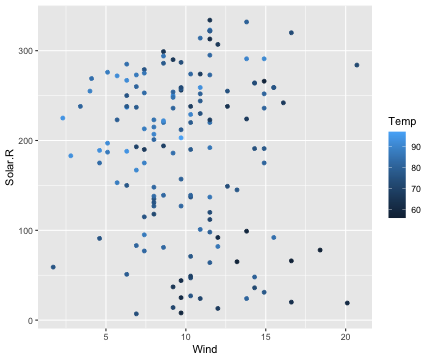

RObject{VecSxp}


┌ Warning: RCall.jl: Warning: Removed 7 rows containing missing values (geom_point).
└ @ RCall /Users/ppalmes/.julia/packages/RCall/iMDW2/src/io.jl:160


In [7]:
p1=R"ggplot(data=airquality)+geom_point(aes(x=Wind,y=Solar.R,color=Temp))"

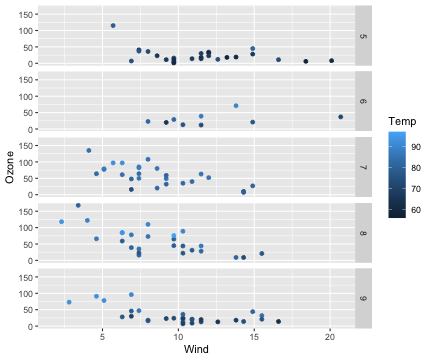

RObject{VecSxp}


┌ Warning: RCall.jl: Warning: Removed 37 rows containing missing values (geom_point).
└ @ RCall /Users/ppalmes/.julia/packages/RCall/iMDW2/src/io.jl:160


In [8]:
p1=R"ggplot(data=airquality)+geom_point(aes(x=Wind,y=Ozone,color=Temp))+facet_grid(Month ~ .)"

In [9]:
rcopy(p1) # translate robj to julia which is a dictionary type

OrderedCollections.OrderedDict{Symbol, Any} with 9 entries:
  :data        => 153×6 DataFrame…
  :layers      => Any[RObject{EnvSxp}…
  :scales      => RObject{EnvSxp}…
  :mapping     => OrderedCollections.OrderedDict{Symbol, Any}()
  :theme       => Any[]
  :coordinates => RObject{EnvSxp}…
  :facet       => RObject{EnvSxp}…
  :plot_env    => RObject{EnvSxp}…
  :labels      => OrderedCollections.OrderedDict{Symbol, Any}(:x=>"Wind", :y=>"…

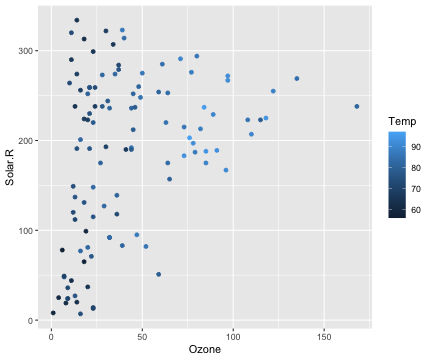

RObject{VecSxp}


┌ Warning: RCall.jl: Warning: Removed 42 rows containing missing values (geom_point).
└ @ RCall /Users/ppalmes/.julia/packages/RCall/iMDW2/src/io.jl:160


In [10]:
p1=R"ggplot(data=airquality)+geom_point(aes(x=Ozone,y=Solar.R,color=Temp))"

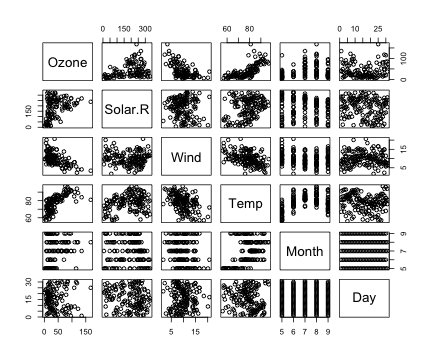

RObject{NilSxp}
NULL


In [11]:
R"plot(airquality)"

In [12]:
R"library(randomForest)"

┌ Warning: RCall.jl: randomForest 4.6-14
│ Type rfNews() to see new features/changes/bug fixes.
│ 
│ Attaching package: ‘randomForest’
│ 
│ The following object is masked from ‘package:ggplot2’:
│ 
│     margin
│ 
└ @ RCall /Users/ppalmes/.julia/packages/RCall/iMDW2/src/io.jl:160


RObject{StrSxp}
[1] "randomForest" "ggplot2"      "stats"        "graphics"     "grDevices"   
[6] "utils"        "datasets"     "methods"      "base"        


In [13]:
R"rfmodel=randomForest(Temp ~ .,data=airquality,na.action=na.omit)" # regression

RObject{VecSxp}

Call:
 randomForest(formula = Temp ~ ., data = airquality, na.action = na.omit) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 25.18575
                    % Var explained: 72.02


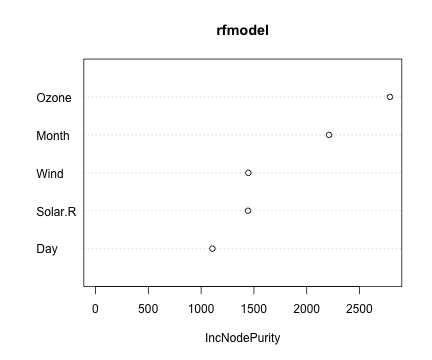

RObject{RealSxp}
        IncNodePurity
Ozone        2788.460
Solar.R      1444.173
Wind         1447.059
Month        2211.661
Day          1106.480


In [14]:
R"varImpPlot(rfmodel)"

In [15]:
R"rfmodel"

RObject{VecSxp}

Call:
 randomForest(formula = Temp ~ ., data = airquality, na.action = na.omit) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 25.18575
                    % Var explained: 72.02


In [16]:
R"randomForest(as.factor(Month) ~ .,data=airquality,na.action=na.omit)" # classification

RObject{VecSxp}

Call:
 randomForest(formula = as.factor(Month) ~ ., data = airquality,      na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 51.35%
Confusion matrix:
   5 6  7 8  9 class.error
5 16 2  2 1  3   0.3333333
6  2 0  2 1  4   1.0000000
7  1 2 13 6  4   0.5000000
8  0 0 10 7  6   0.6956522
9  4 2  1 4 18   0.3793103


In [17]:
R"library(caret)"

┌ Warning: RCall.jl: Loading required package: lattice
└ @ RCall /Users/ppalmes/.julia/packages/RCall/iMDW2/src/io.jl:160


RObject{StrSxp}
 [1] "caret"        "lattice"      "randomForest" "ggplot2"      "stats"       
 [6] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[11] "base"        


In [18]:
R"crf=train(Temp ~ .,data=airquality,method='rf',na.action=na.omit)"

RObject{VecSxp}
Random Forest 

153 samples
  5 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 111, 111, 111, 111, 111, 111, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  2     5.004187  0.7263875  4.087862
  3     4.987707  0.7272507  4.033384
  5     5.219400  0.7079247  4.142472

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 3.


In [19]:
R"ctreebag=train(Temp ~ .,data=airquality,method='treebag',na.action=na.omit)"

RObject{VecSxp}
Bagged CART 

153 samples
  5 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 111, 111, 111, 111, 111, 111, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  5.425302  0.6981537  4.375082



In [20]:
crf_j=rcopy(@rget crf);
ctreebag_j=rcopy(@rget ctreebag)

OrderedCollections.OrderedDict{Symbol, Any} with 24 entries:
  :method       => "treebag"
  :modelInfo    => OrderedCollections.OrderedDict{Symbol, Any}(:label=>"Bagged …
  :modelType    => "Regression"
  :results      => 1×7 DataFrame…
  :pred         => nothing
  :bestTune     => 1×1 DataFrame…
  :call         => :(var"train.formula"($(Expr(:(=), :form, :(Temp ~ var"."))),…
  :dots         => Any[]
  :metric       => "RMSE"
  :control      => OrderedCollections.OrderedDict{Symbol, Any}(:method=>"boot",…
  :finalModel   => OrderedCollections.OrderedDict{Symbol, Any}(:y=>[67, 72, 74,…
  :preProcess   => nothing
  :trainingData => 153×6 DataFrame…
  :resample     => 25×4 DataFrame…
  :resampledCM  => nothing
  :perfNames    => ["RMSE", "Rsquared", "MAE"]
  :maximize     => false
  :yLimits      => [55.0, 99.0]
  :times        => OrderedCollections.OrderedDict{Symbol, Any}(:everything=>[2.…
  :levels       => missing
  :terms        => Temp ~ Ozone + Solar.R + Wind + Month + Day
  :coefn

## Julia wrappers of R caret using RCall APIs

In [36]:
module RWrapper
using DataFrames
using RCall
function fit!(learner,x,y)
    xx = x |> DataFrame
    yy = y |> Vector
    rres = rcall(:train,xx,yy,method=learner)
    rres
end

function transform!(model,x)
    xx = x |> DataFrame
    res = rcall(:predict,model,xx) #in robj
    return rcopy(res) # return extracted robj
end
end


Main.RWrapper

In [52]:
using DataFrames
learner = "rf"
iris=rcopy(R"iris")
x=iris[:,1:4] 
y=iris[:,5] |> Vector{String}
model = RWrapper.fit!(learner,x,y) #robject
print(model)
prediction=RWrapper.transform!(model,x) |> collect;

RObject{VecSxp}
Random Forest 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 150, 150, 150, 150, 150, 150, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9530467  0.9284280
  3     0.9543747  0.9303918
  4     0.9528508  0.9281008

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.


In [53]:
R"table($prediction,$y)"

RObject{IntSxp}
            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         50         0
  virginica       0          0        50


## Grid search for parameter optimization

In [54]:
R"tunegrid <- expand.grid(.mtry=c(1:10))"

RObject{VecSxp}
   .mtry
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10


In [55]:
R"control <- trainControl(method='repeatedcv', number=3, repeats=3, search='grid')"

RObject{VecSxp}
$method
[1] "repeatedcv"

$number
[1] 3

$repeats
[1] 3

$search
[1] "grid"

$p
[1] 0.75

$initialWindow
NULL

$horizon
[1] 1

$fixedWindow
[1] TRUE

$skip
[1] 0

$verboseIter
[1] FALSE

$returnData
[1] TRUE

$returnResamp
[1] "final"

$savePredictions
[1] FALSE

$classProbs
[1] FALSE

$summaryFunction
function (data, lev = NULL, model = NULL) 
{
    if (is.character(data$obs)) 
        data$obs <- factor(data$obs, levels = lev)
    postResample(data[, "pred"], data[, "obs"])
}
<bytecode: 0x7fbf441f4990>
<environment: namespace:caret>

$selectionFunction
[1] "best"

$preProcOptions
$preProcOptions$thresh
[1] 0.95

$preProcOptions$ICAcomp
[1] 3

$preProcOptions$k
[1] 5

$preProcOptions$freqCut
[1] 19

$preProcOptions$uniqueCut
[1] 10

$preProcOptions$cutoff
[1] 0.9


$sampling
NULL

$index
NULL

$indexOut
NULL

$indexFinal
NULL

$timingSamps
[1] 0

$predictionBounds
[1] FALSE FALSE

$seeds
[1] NA

$adaptive
$adaptive$min
[1] 5

$adaptive$alpha
[1] 0.05

$adaptive$method


In [56]:
R"crf=train(Temp ~ .,data=airquality,method='rf',na.action=na.omit,tuneGrid=tunegrid, trControl=control)"

┌ Warning: RCall.jl: Warning in randomForest.default(x, y, mtry = param$mtry, ...) :
│   invalid mtry: reset to within valid range
│ Warning in randomForest.default(x, y, mtry = param$mtry, ...) :
│   invalid mtry: reset to within valid range
│ Warning in randomForest.default(x, y, mtry = param$mtry, ...) :
│   invalid mtry: reset to within valid range
│ Warning in randomForest.default(x, y, mtry = param$mtry, ...) :
│   invalid mtry: reset to within valid range
│ Warning in randomForest.default(x, y, mtry = param$mtry, ...) :
│   invalid mtry: reset to within valid range
│ Warning in randomForest.default(x, y, mtry = param$mtry, ...) :
│   invalid mtry: reset to within valid range
│ Warning in randomForest.default(x, y, mtry = param$mtry, ...) :
│   invalid mtry: reset to within valid range
│ Warning in randomForest.default(x, y, mtry = param$mtry, ...) :
│   invalid mtry: reset to within valid range
│ Warning in randomForest.default(x, y, mtry = param$mtry, ...) :
│   invalid mtry: r

RObject{VecSxp}
Random Forest 

153 samples
  5 predictor

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 3 times) 
Summary of sample sizes: 72, 75, 75, 72, 74, 76, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   1    5.142543  0.7450910  4.243202
   2    4.892412  0.7529497  4.026960
   3    4.853250  0.7550229  3.950446
   4    4.831973  0.7544558  3.905386
   5    4.893683  0.7470468  3.928619
   6    4.883012  0.7484908  3.917104
   7    4.888645  0.7482879  3.920312
   8    4.898984  0.7470844  3.939336
   9    4.899319  0.7467118  3.928167
  10    4.901357  0.7465668  3.929588

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 4.


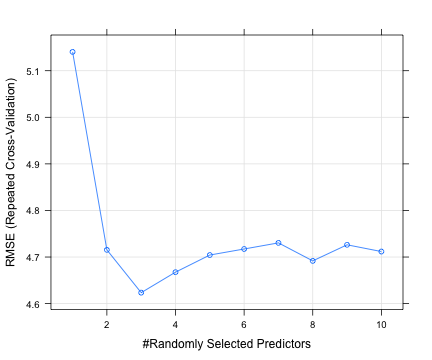

RObject{VecSxp}


In [27]:
R"plot(crf)"

mtry = 1  OOB error = 24.47336 
Searching left ...
Searching right ...
mtry = 2 	OOB error = 21.57778 
0.1183153 0.05 


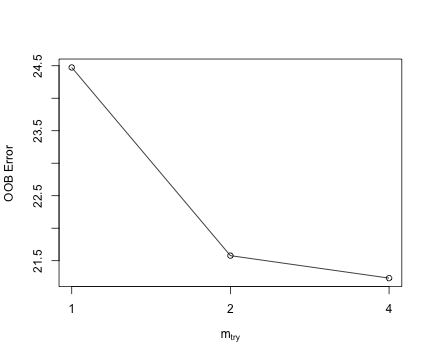

mtry = 4 	OOB error = 21.23176 
0.01603631 0.05 


RObject{RealSxp}
  mtry OOBError
1    1 24.47336
2    2 21.57778
4    4 21.23176


In [28]:
R"dcomp=airquality[complete.cases(airquality),]"
R"bestmtry <- tuneRF(dcomp[,-4],dcomp[,4], ntree=500)"

In [29]:
iris_j=rcopy(R"iris")

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [30]:
model=R"train(Species ~ .,data=$iris_j,method='rf')"

RObject{VecSxp}
Random Forest 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 150, 150, 150, 150, 150, 150, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9520924  0.9271737
  3     0.9491638  0.9227639
  4     0.9485849  0.9219553

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


In [31]:
rcopy(model)

OrderedCollections.OrderedDict{Symbol, Any} with 23 entries:
  :method       => "rf"
  :modelInfo    => OrderedCollections.OrderedDict{Symbol, Any}(:label=>"Random …
  :modelType    => "Classification"
  :results      => 3×5 DataFrame…
  :pred         => nothing
  :bestTune     => 1×1 DataFrame…
  :call         => :(var"train.formula"($(Expr(:(=), :form, :(Species ~ var".")…
  :dots         => Any[]
  :metric       => "Accuracy"
  :control      => OrderedCollections.OrderedDict{Symbol, Any}(:method=>"boot",…
  :finalModel   => OrderedCollections.OrderedDict{Symbol, Any}(:call=>:(randomF…
  :preProcess   => nothing
  :trainingData => 150×5 DataFrame…
  :resample     => 25×3 DataFrame…
  :resampledCM  => 75×11 DataFrame…
  :perfNames    => ["Accuracy", "Kappa"]
  :maximize     => true
  :yLimits      => nothing
  :times        => OrderedCollections.OrderedDict{Symbol, Any}(:everything=>[2.…
  :levels       => ["setosa", "versicolor", "virginica"]
  :terms        => Species ~ Sepal_Length